In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv.zip to train.csv.zip


In [ ]:
toxic=pd.read_csv(r'train.csv.zip')

In [ ]:
df=pd.DataFrame(toxic)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


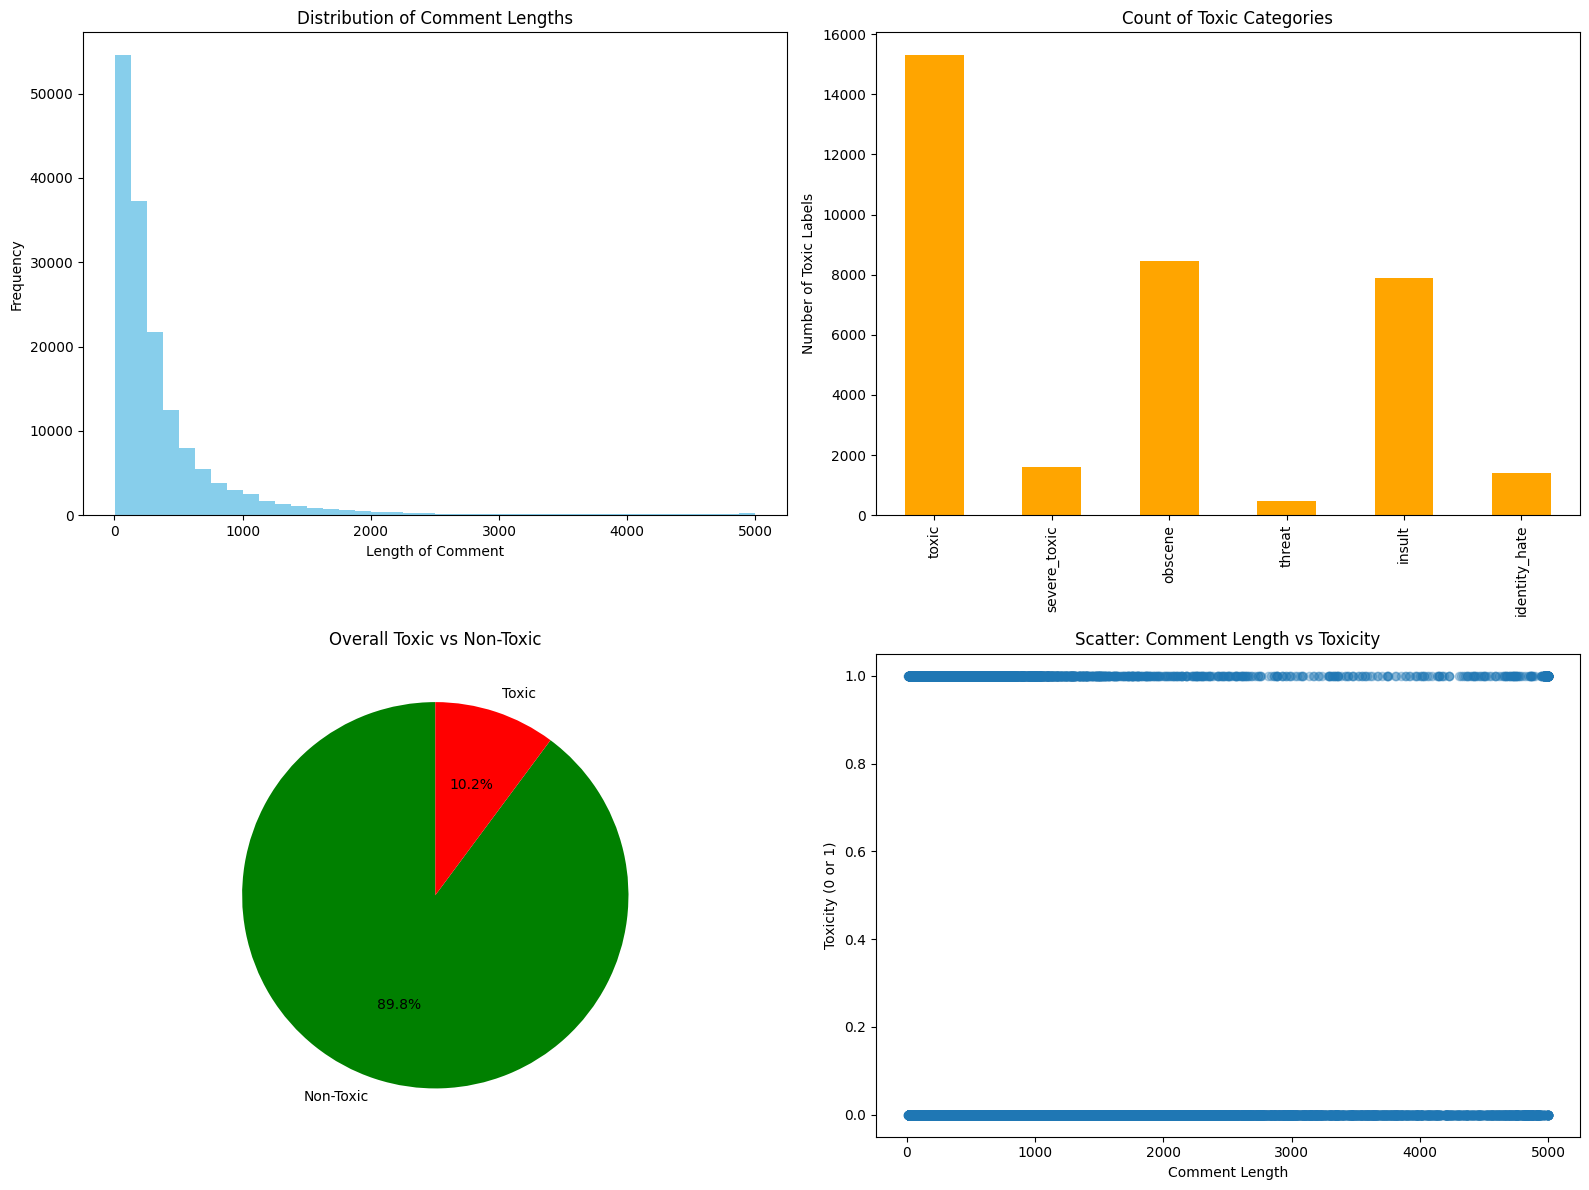

In [64]:
plt.figure(figsize=(16,12))


plt.subplot(2, 2, 1)
plt.hist(df["comment_length"], bins=40, color="skyblue")
plt.title("Distribution of Comment Lengths")
plt.xlabel("Length of Comment")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
df[category_cols].sum().plot(kind="bar", color="orange")
plt.title("Count of Toxic Categories")
plt.ylabel("Number of Toxic Labels")

plt.subplot(2, 2, 3)
df["overall_toxic"].value_counts().plot(
    kind="pie",
    autopct='%1.1f%%',
    labels=["Non-Toxic", "Toxic"],
    colors=["green", "red"],
    startangle=90
)
plt.title("Overall Toxic vs Non-Toxic")
plt.ylabel("")


plt.subplot(2, 2, 4)
plt.scatter(df["comment_length"], df["overall_toxic"], alpha=0.3)
plt.title("Scatter: Comment Length vs Toxicity")
plt.xlabel("Comment Length")
plt.ylabel("Toxicity (0 or 1)")

plt.tight_layout()
plt.show()


In [ ]:
vect=CountVectorizer()

In [ ]:
total_toxicity=['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [ ]:
df['toxic']=df[total_toxicity].max(axis=1)

In [ ]:
print(df[['comment_text','toxic']].tail())

                                             comment_text  toxic
159566  ":::::And for the second time of asking, when ...      0
159567  You should be ashamed of yourself \n\nThat is ...      0
159568  Spitzer \n\nUmm, theres no actual article for ...      0
159569  And it looks like it was actually you who put ...      0
159570  "\nAnd ... I really don't think you understand...      0


In [ ]:
print(df['toxic'].value_counts())

toxic
0    144277
1     15294
Name: count, dtype: int64


In [ ]:
vect=CountVectorizer(max_features=10000,stop_words='english',min_df=2)

In [ ]:
x=df['comment_text']
y=df['toxic']
vect_x=vect.fit_transform(x),

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(vect_x[0],y,test_size=0.2,random_state=42)

In [ ]:
model=MultinomialNB()

In [ ]:
model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
print(accuracy_score(y_test,model.predict(x_test)))

0.9474541751527495


In [ ]:
print(df[['comment_text','toxic']].head(20))

                                         comment_text  toxic
0   Explanation\nWhy the edits made under my usern...      0
1   D'aww! He matches this background colour I'm s...      0
2   Hey man, I'm really not trying to edit war. It...      0
3   "\nMore\nI can't make any real suggestions on ...      0
4   You, sir, are my hero. Any chance you remember...      0
5   "\n\nCongratulations from me as well, use the ...      0
6        COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1
7   Your vandalism to the Matt Shirvington article...      0
8   Sorry if the word 'nonsense' was offensive to ...      0
9   alignment on this subject and which are contra...      0
10  "\nFair use rationale for Image:Wonju.jpg\n\nT...      0
11  bbq \n\nbe a man and lets discuss it-maybe ove...      0
12  Hey... what is it..\n@ | talk .\nWhat is it......      1
13  Before you start throwing accusations and warn...      0
14  Oh, and the girl above started her arguments w...      0
15  "\n\nJuelz Santanas 

In [ ]:
cm= confusion_matrix(y_test,model.predict(x_test))
cm

array([[28065,   794],
       [  883,  2173]])

<Axes: >

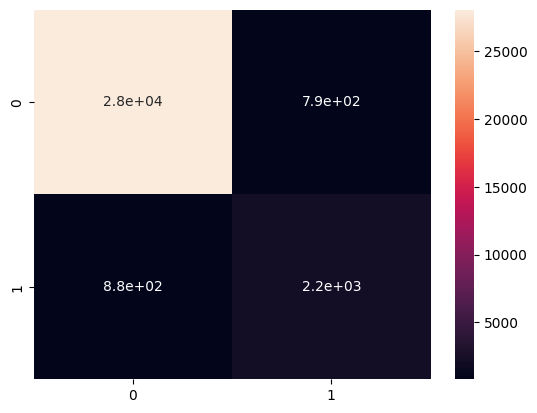

In [ ]:
sns.heatmap(cm,annot=True)

In [71]:
def predict_toxic(comment_text):
    """
    Predict whether a comment is toxic or not.
    Output: 0 = Positive / Clean, 1 = Negative / Toxic
    """
    comment = str(comment_text).lower().strip()
    x = vect.transform([comment])
    pred = model.predict(x)[0]
    return 'NEGATIVE COMMENT' if pred == 1 else 'POSITIVE COMMENT'

In [75]:
print(predict_toxic('you are an idiot'

))


NEGATIVE COMMENT


In [77]:
import pickle
import google.colab
Toxic_model = open('Toxic_model.pkl','wb')
pickle.dump(model, Toxic_model)
google.colab.files.download('Toxic_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

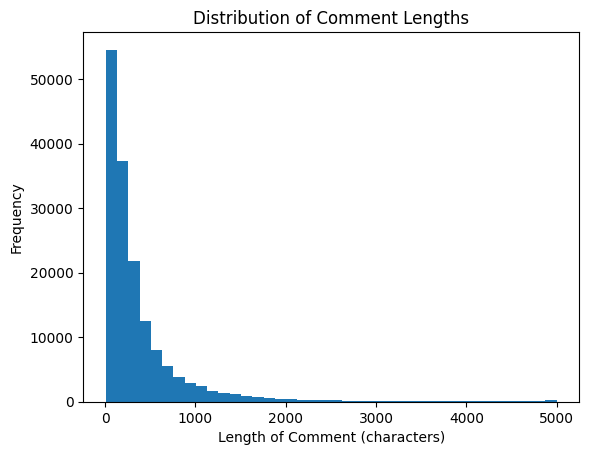

In [ ]:
df["comment_length"] = df["comment_text"].astype(str).apply(len)
plt.hist(df["comment_length"], bins=40)
plt.title("Distribution of Comment Lengths")
plt.xlabel("Length of Comment (characters)")
plt.ylabel("Frequency")
plt.show()


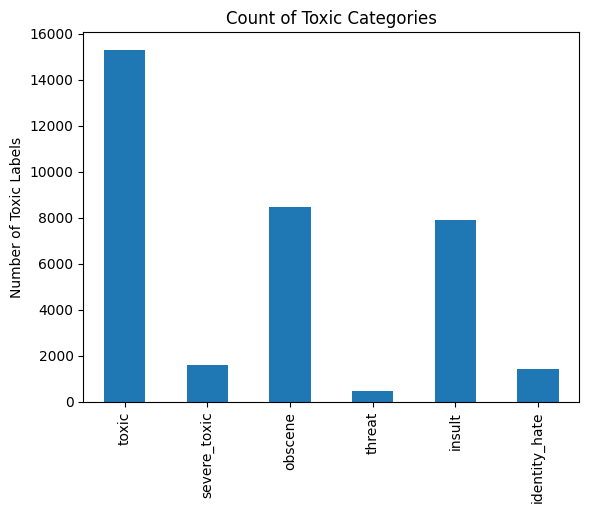

In [58]:
category_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
df[category_cols].sum().plot(kind="bar"),
plt.title("Count of Toxic Categories")
plt.ylabel("Number of Toxic Labels")
plt.show()

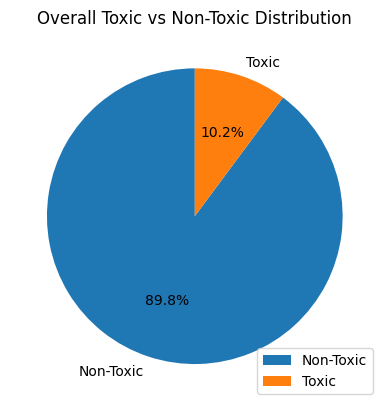

In [56]:
df["overall_toxic"] = df[category_cols].max(axis=1) # 1 if any toxic category

toxic_count = df["overall_toxic"].value_counts()

plt.pie(toxic_count, labels=["Non-Toxic", "Toxic"], autopct="%1.1f%%", startangle=90)
plt.title("Overall Toxic vs Non-Toxic Distribution")
plt.legend()
plt.show()
